<a href="https://colab.research.google.com/github/faithNassiwa/predictive-diagnosis-assistant/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
library("data.table")

In [50]:
library("dplyr")

In [51]:
EDA <- fread("/content/release_train_patients.csv")

In [53]:
pathologies <- unique(EDA[,"PATHOLOGY"])

In [58]:
initial_symptom <- unique(EDA[,"INITIAL_EVIDENCE"])

In case we need to switch to R we can use this to save the file and open

In [ ]:
write.csv(pathologies, file = "pathologies.csv")
write.csv(initial_symptom, file = "initial_symptom.csv")

In [60]:
age <- EDA [,"AGE"]

In [61]:
library("ggplot2")

In [62]:
age <- data.frame(age)

In [63]:
options(repr.plot.width = 16, repr.plot.height = 12)

Trying to identify why we have so many 0 ages if those are NA or new borns

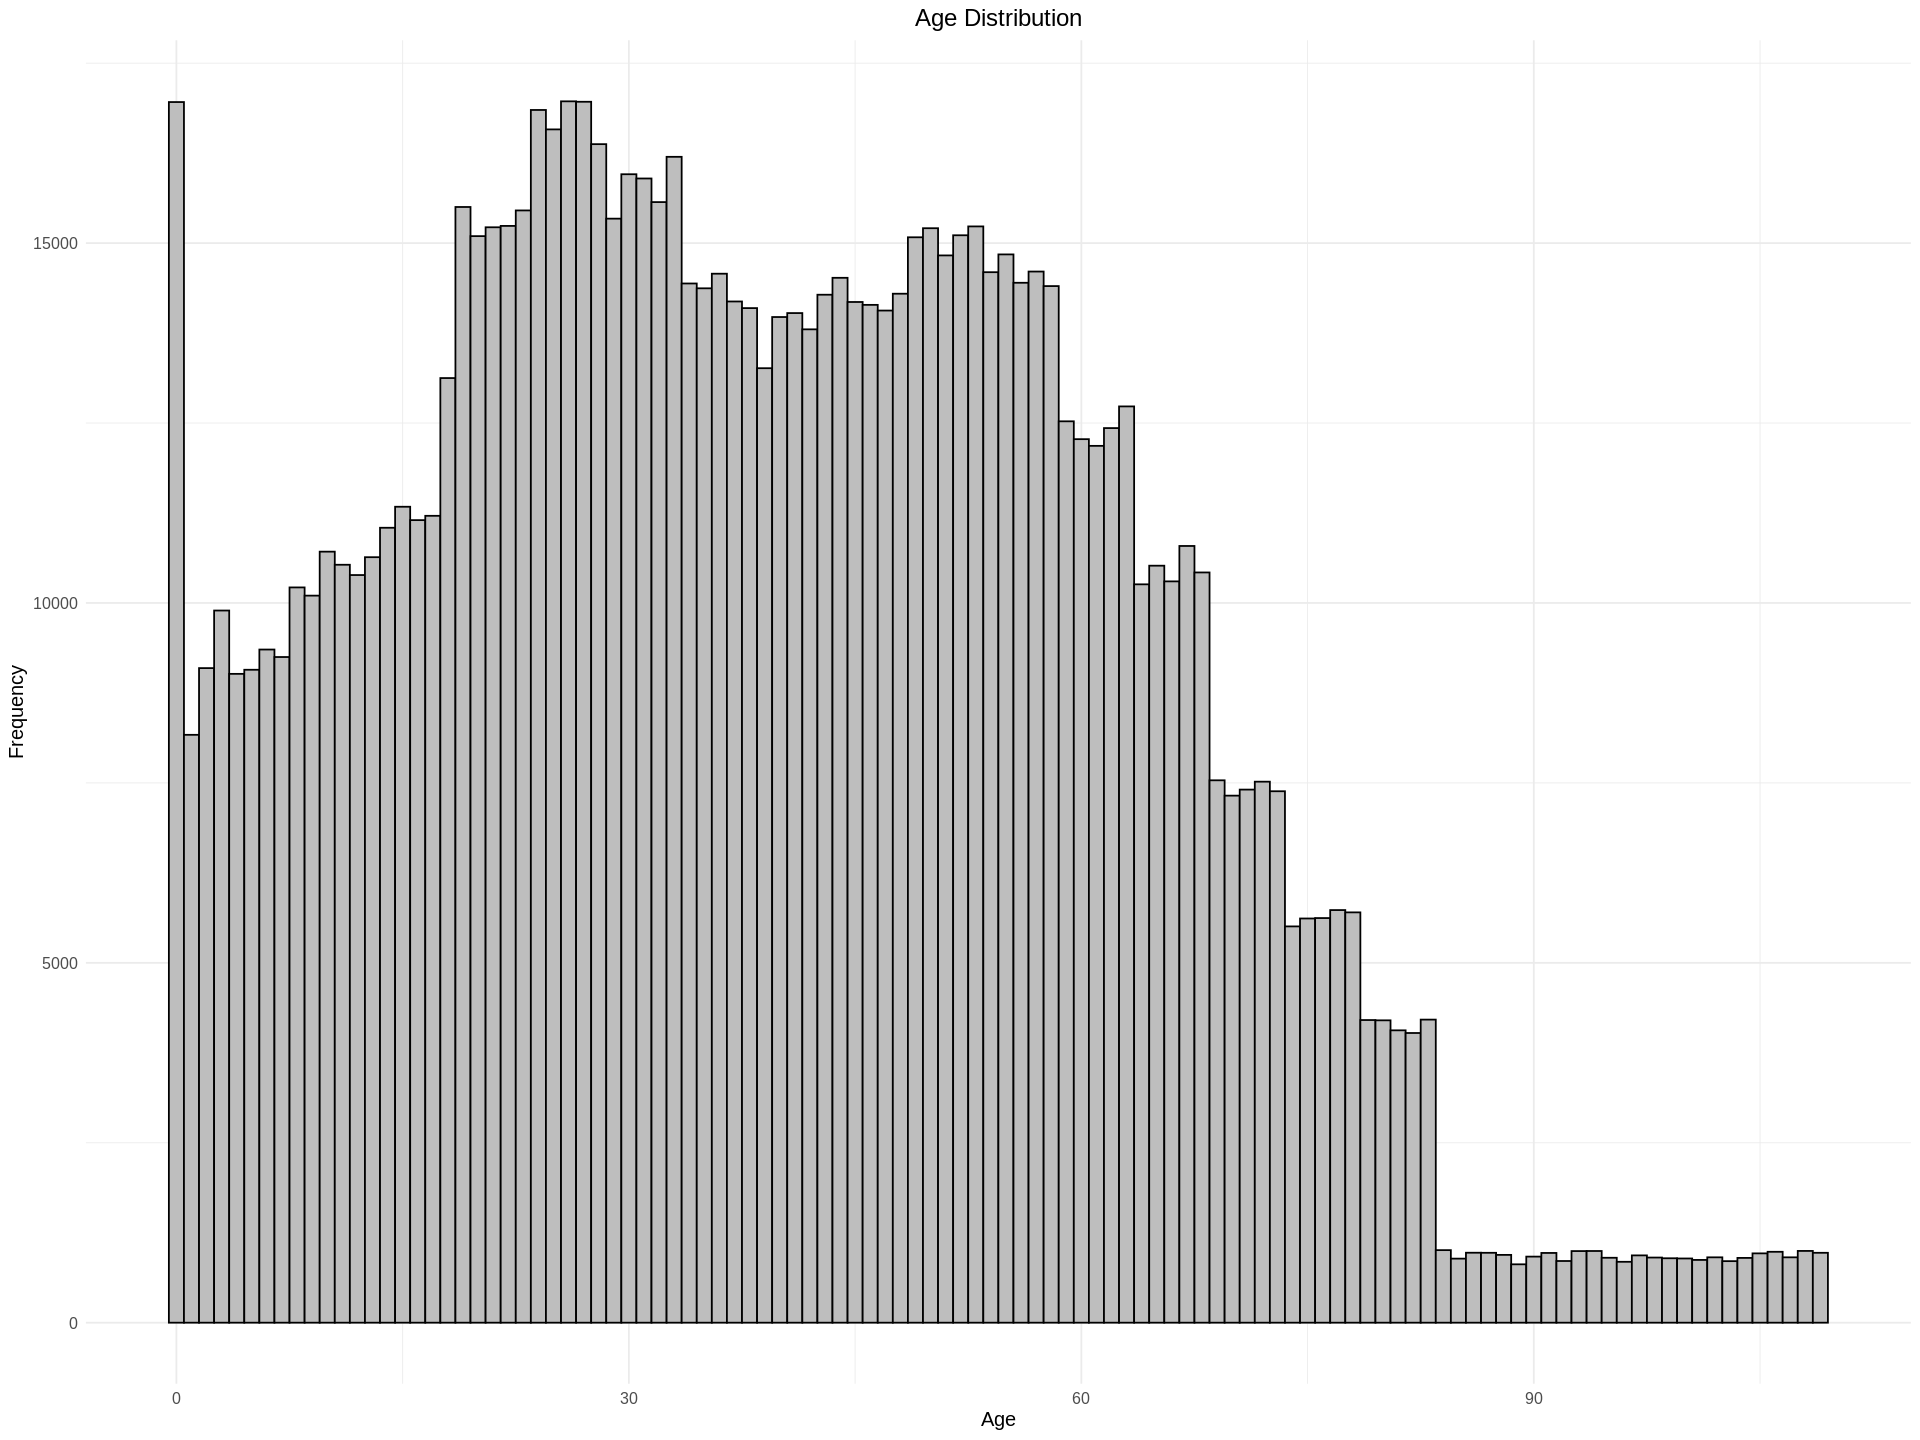

In [64]:
age_plot <- ggplot(data = data.frame(age = age), aes(x = AGE)) +
  geom_histogram(binwidth = 1, fill = "gray", color = "black") +
  labs(x = "Age", y = "Frequency", title = "Age Distribution") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 12))

print(age_plot)

In [65]:
age_counts <- table(age)

In [66]:
age_counts

AGE
    0     1     2     3     4     5     6     7     8     9    10    11    12 
16960  8168  9095  9895  9015  9072  9353  9249 10216 10102 10713 10531 10388 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
10636 11045 11337 11151 11211 13125 15502 15097 15220 15239 15454 16850 16580 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
16970 16964 16375 15340 15957 15898 15570 16199 14439 14372 14575 14189 14097 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
13262 13973 14028 13802 14283 14518 14182 14142 14063 14297 15081 15207 14829 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
15109 15232 14596 14843 14449 14605 14403 12524 12276 12183 12430 12731 10259 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
10518 10300 10792 10424  7536  7323  7407  7517  7384  5506  5616  5622  5733 
   78    79    80    81    82    83    84    85 

In [ ]:
age_counts_df <- as.data.frame(age_counts)
colnames(age_counts_df) <- c("Age", "Count")
age_counts_df

In [70]:
subset_df <- EDA[EDA$AGE == 0, ]

Find out that all of those were new born that were adimitted